In [25]:
import sys
sys.path.append("../../")

import torch
import torchvision.utils
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch import optim
from torch.utils.data import DataLoader

import src.nnArch.BasicSiamese as bSiamese
import src.utils.Visual as vis
import src.utils.DatasetLoader as dsetLoader
import src.utils.LossFunction as lossFunc

from src.config.Param import *

In [26]:
MODEL_PATH = '../../models/model-9f7000ad44e54186905deac69bf61e78.pth'
DATATEST_PATH = '../../dataset/cuhk02/datatest.csv'
IMAGES_PATH = '../../dataset/cuhk02/images/full/'

In [27]:
trans = transforms.Compose([transforms.ToTensor()])
test_dataset = dsetLoader.ContrastiveDataset(csv_path=DATATEST_PATH, images_path=IMAGES_PATH, transform=trans)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [28]:
model  = bSiamese.BasicSiameseNetwork()
model.load_state_dict(torch.load(MODEL_PATH))
model.eval()

BasicSiameseNetwork(
  (cnn1): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
    (2): ReLU(inplace=True)
    (3): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReflectionPad2d((1, 1, 1, 1))
    (5): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU(inplace=True)
    (7): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): ReflectionPad2d((1, 1, 1, 1))
    (10): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (11): ReLU(inplace=True)
    (12): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(30, 80))
  (fc1): Sequential(
    (0): Linear(in_features=38400, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=1000, out_features=500, bias=T

Dissimilarity 0.6004696284860702


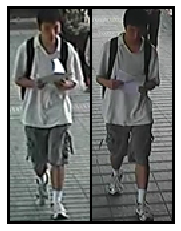

Dissimilarity 0.5787292788546767


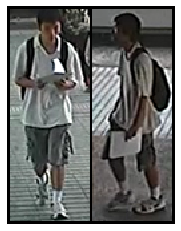

Dissimilarity 0.5756062514516649


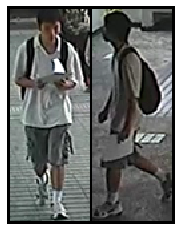

Dissimilarity 0.4804196416003934


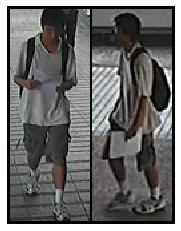

Dissimilarity 0.471931740856254


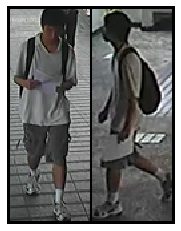

Dissimilarity 0.17310564303158626


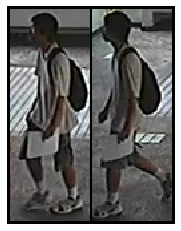

Dissimilarity 0.657051756656528


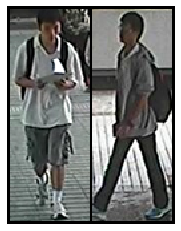

Dissimilarity 0.6782247764614471


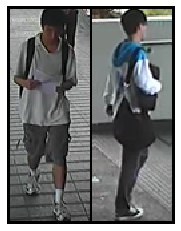

Dissimilarity 0.7431484738558611


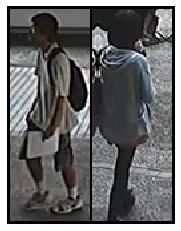

Dissimilarity 0.7546357696282275


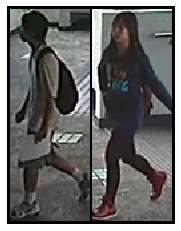

Dissimilarity 0.6111275833711145


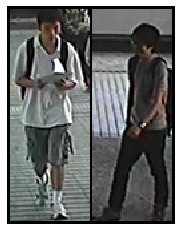

Dissimilarity 0.670978801635385


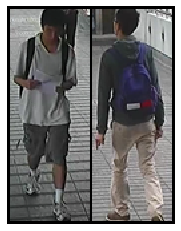

Dissimilarity 0.7340768666305112


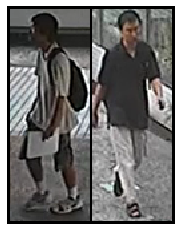

Dissimilarity 0.7425248768687156


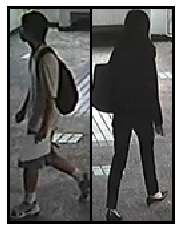

In [29]:
dataiter = iter(test_dataloader)
with torch.no_grad():
    for i in range(len(test_dataloader)):
        img1, img2, label = next(dataiter)
        concatenated = torch.cat((img1, img2),0)

        img1 = img1.to(Param.device)
        img2 = img2.to(Param.device)
        label = label.to(Param.device)
        
        out1, out2 = model(img1, img2)
        euclidean_distance = F.pairwise_distance(out1, out2)
        d = float(euclidean_distance.item())
        d = abs((1 / (1 + d)) - 1)
        
        print('Dissimilarity', d)
        vis.imshow(torchvision.utils.make_grid(concatenated))